IMPOETING LIBRARES

In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
# from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler

IMPORTING BOSTAN HOUSE PRICE DATASET

In [2]:
orignal_dataset=pd.read_csv('boston.csv')

In [3]:
orignal_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,TRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
orignal_dataset.shape

(506, 14)

In [5]:
orignal_dataset.isnull().sum()

        CRIM         0
             ZN      0
      INDUS          0
         CHAS        0
          NOX        0
            RM       0
           AGE       0
            DIS      0
           RAD       0
           TAX       0
     TRATIO          0
                B    0
       LSTAT         0
       MEDV          0
dtype: int64

In [6]:
orignal_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,TRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


uunderstanding the correlation between various features in the dataset

1. Positive relation
2. negative relation

<AxesSubplot:>

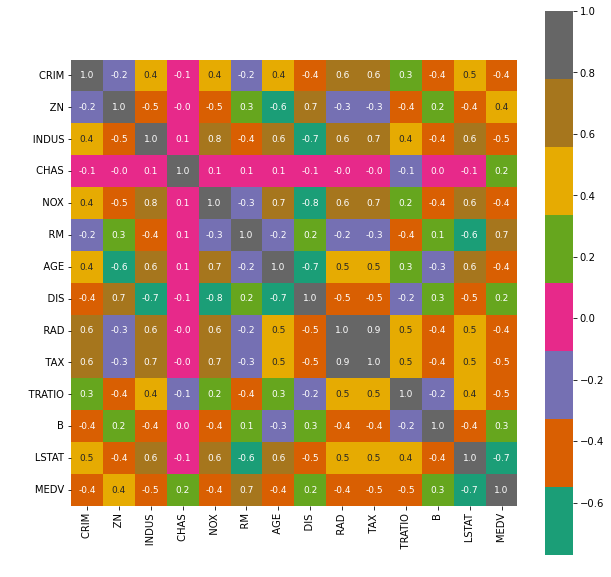

In [7]:
correlation=orignal_dataset.corr()
#constructing a heatmap to understand the colrelation 
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True, annot_kws={'size':9},cmap='Dark2')

In [8]:
x=orignal_dataset.iloc[:,:-1]
y=orignal_dataset.iloc[:,-1]

In [9]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,TRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1+2+3+4)

In [11]:
x_train.shape,y_train.shape,x_test.shape

((354, 13), (354,), (152, 13))

In [12]:
sc=StandardScaler()

In [13]:
x_train=sc.fit_transform(x_train)

In [14]:
x_test=sc.transform(x_test)

In [15]:
reg=LinearRegression()

In [16]:
reg.fit(x_train,y_train)

LinearRegression()

In [17]:
reg.coef_

array([-1.252809  ,  1.56150248, -0.16861008,  0.37449384, -1.7776332 ,
        2.23783886,  0.3168073 , -3.27712377,  2.69471035, -2.10285702,
       -1.74689193,  1.22356691, -3.83454078])

In [18]:
reg.intercept_

21.971186440677965

In [28]:
x_test_pred=reg.predict(x_test)
x_test_pred

array([31.4243217 , 31.96785487, 30.93785448, 22.34313349, 18.83846235,
       16.20617519, 35.92908162, 14.74157477, 25.07700756, 37.13230282,
       21.47652971, 30.92661826, 28.07823424, 34.02599249, 33.7778476 ,
       40.63701192, 24.25899783, 23.43019291, 25.547906  , 21.34469147,
       32.65467539, 17.80506124, 25.46149722, 25.0207691 , 32.51742137,
       20.51357936, 19.47165255, 16.87107974, 38.44316206,  0.3888111 ,
       32.39559257, 32.15518102, 26.05305015, 23.82049084, 20.56494632,
       19.66990981,  3.53212643, 35.21058387, 27.03280773, 27.67994129,
       34.36642896, 29.82003002, 18.31717228, 31.55109654, 17.93465111,
       28.4618882 , 19.39950216, 21.60782793, 38.10391926, 16.45101411,
       24.51003632, 19.57072199, 24.53359986, 34.34589029, 26.74381857,
       34.86340026, 21.02859444, 19.77400901, 18.68461884, 24.64911818,
       19.89923131, 23.52871967, 39.56690084, 42.81848202, 30.38116596,
       16.96889789, 23.83550068,  3.18952008, 31.52469303, 28.66

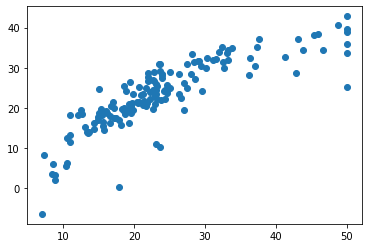

In [20]:
plt.scatter(y_test,x_test_pred)

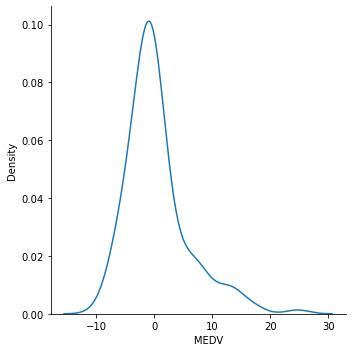

In [21]:
error=y_test-x_test_pred
sns.displot(error,kind='kde')

In [22]:
print(mean_absolute_error(y_test,x_test_pred))
print(mean_squared_error(y_test,x_test_pred))
print(np.sqrt(mean_squared_error(y_test,x_test_pred)))

3.707127137271813
29.32659652612325
5.41540363464472


In [27]:
score=r2_score(y_test,x_test_pred)
score

0.6996255772983114

In [39]:
re=x_test[0].reshape(1,-1)
print(re.shape)
reg.predict(re)

(1, 13)


array([31.4243217])

In [41]:
import pickle

In [42]:
pickle.dump(reg,open('regmodel.pkl','wb'))

In [44]:
pickle_model=pickle.load(open('regmodel.pkl','rb'))

In [45]:
pickle_model.predict(re)

array([31.4243217])